# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from base.base_models import BaseModel
from base.benchmark_dataset import BenchmarkDataset
from base.model_creator import Optimizer
from base.model_evaluator import DataSource, DataPredSelection
from m_utils.mtl_approach import MTLApproach
from m_utils.constants import ICAO_REQ, MNIST_TASK

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_mobilenet_mnist',
        'description': 'Training MTL network for MNIST tasks with Handcrafted 1 network architecture',
        'tags': ['mtl', 'handcrafted_1', 'mnist', 'benchmark', 'custom'],
        'src_files': ["src"]
    },
    'properties': {
        'approach': MTLApproach.HAND_1,
        'benchmarking': {
            'use_benchmark_data': False,
            'benchmark_dataset': BenchmarkDataset.MNIST,
            'tasks': list(MNIST_TASK)
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': True,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': list(ICAO_REQ),
            'aligned': True,
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': False,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.MOBILENET_V2,
        'batch_size': 32,
        'n_epochs': 2,
        'early_stopping': 50,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 134203
Process ID: 410561
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Training MTL network for MNIST tasks with '
                               'Handcrafted 1 network architecture',
                'name': 'train_mobilenet_mnist',
                'src_files': ['src'],
                'tags': ['mtl',
                         'handcrafted_1',
                         'mnist',
                         'benchmark',
                         'custom']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.MOBILENET_V2: {'name': 'mobilnet_v2', 'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f28371be5e0>}>,
                      'batch_size': 32,
                      'dropout': 0.3,
                      'early_stopping': 50,
                      'learning_rate': 0.00

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4926, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4926 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5761

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [9]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: MOUTH
N_TRAIN_COMP: 3612 (73.33%)
N_TRAIN_NOT_COMP: 1314 (26.67%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 408 (74.59%)
N_VALIDATION_NOT_COMP: 139 (25.41%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 222 (77.08%)
N_TEST_NOT_COMP: 66 (22.92%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: ROTATION
N_TRAIN_COMP: 3704 (75.19%)
N_TRAIN_NOT_COMP: 1222 (24.81%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 405 (74.04%)
N_VALIDATION_NOT_COMP: 142 (25.96%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 223 (77.43%)
N_TEST_NOT_COMP: 65 (22.57%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: L_AWAY
N_TRAIN_COMP: 3388 (68.78%)
N_TRAIN_NOT_COMP: 1538 (31.22%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 373 (68.19%)
N_VALIDATION_NOT_COMP: 174 (31.81%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 195 (67.71%)
N_TEST_NOT_COMP: 93 (32.29%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: EYES_CLOSED
N_TRAIN_COMP: 3896 (79.09%)
N_TRAIN_NOT_COMP: 1030 (20.91%)
N_TRAIN_D

# Create Model

In [10]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

In [11]:
runner.visualize_model(outfile_path=f"figs/handcrafted_mtl_model_1_mnist.png")

-------------------- vizualize model -------------------


In [12]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

# Training Model

In [13]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 2,811,694
  .. Trainable params: 553,710
  .. Non-trainable params: 2,257,984
Epoch 1/2
153/153 [==============================] - 55s 303ms/step - loss: 1.0218 - mouth_loss: 0.6305 - rotation_loss: 0.5805 - l_away_loss: 0.5464 - eyes_closed_loss: 0.3742 - close_loss: 0.1793 - hat_loss: 0.4929 - dark_glasses_loss: 0.2680 - frames_heavy_loss: 0.1258 - frame_eyes_loss: 0.5195 - flash_lenses_loss: 0.4753 - veil_loss: 0.3380 - reflection_loss: 0.6887 - light_loss: 0.3917 - sh_face_loss: 0.6609 - sh_head_loss: 0.6516 - blurred_loss: 0.3913 - ink_mark_loss: 0.1156 - skin_tone_loss: 0.6811 - washed_out_loss: 0.1788 - pixelation_loss: 0.3649 - hair_eyes_loss: 0.4962 - background_loss: 0.6766 - red_eyes_loss: 0.3900 - mouth_accuracy: 0.7303 - rotation_accuracy: 0.7493 - l_away_accuracy: 0.6864 - eyes_closed_accuracy: 0.7879 - close_accuracy: 0.9832 - hat_accura

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/2
153/153 [==============================] - 43s 283ms/step - loss: 0.9035 - mouth_loss: 0.6138 - rotation_loss: 0.5561 - l_away_loss: 0.5104 - eyes_closed_loss: 0.2953 - close_loss: 0.0958 - hat_loss: 0.4568 - dark_glasses_loss: 0.1779 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.4625 - flash_lenses_loss: 0.4382 - veil_loss: 0.2635 - reflection_loss: 0.6819 - light_loss: 0.3360 - sh_face_loss: 0.6495 - sh_head_loss: 0.6363 - blurred_loss: 0.3400 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6736 - washed_out_loss: 0.0810 - pixelation_loss: 0.3053 - hair_eyes_loss: 0.4613 - background_loss: 0.6688 - red_eyes_loss: 0.3087 - mouth_accuracy: 0.7336 - rotation_accuracy: 0.7523 - l_away_accuracy: 0.6880 - eyes_closed_accuracy: 0.7906 - close_accuracy: 0.9896 - hat_accuracy: 0.8537 - dark_glasses_accuracy: 0.8866 - frames_heavy_accuracy: 0.9963 - frame_eyes_accuracy: 0.7088 - flash_lenses_accuracy: 0.7926 - veil_accuracy: 0.9373 - reflection_accuracy: 0.5229 - light_accuracy: 0.921

# Plots

-------------------- draw training history -------------------


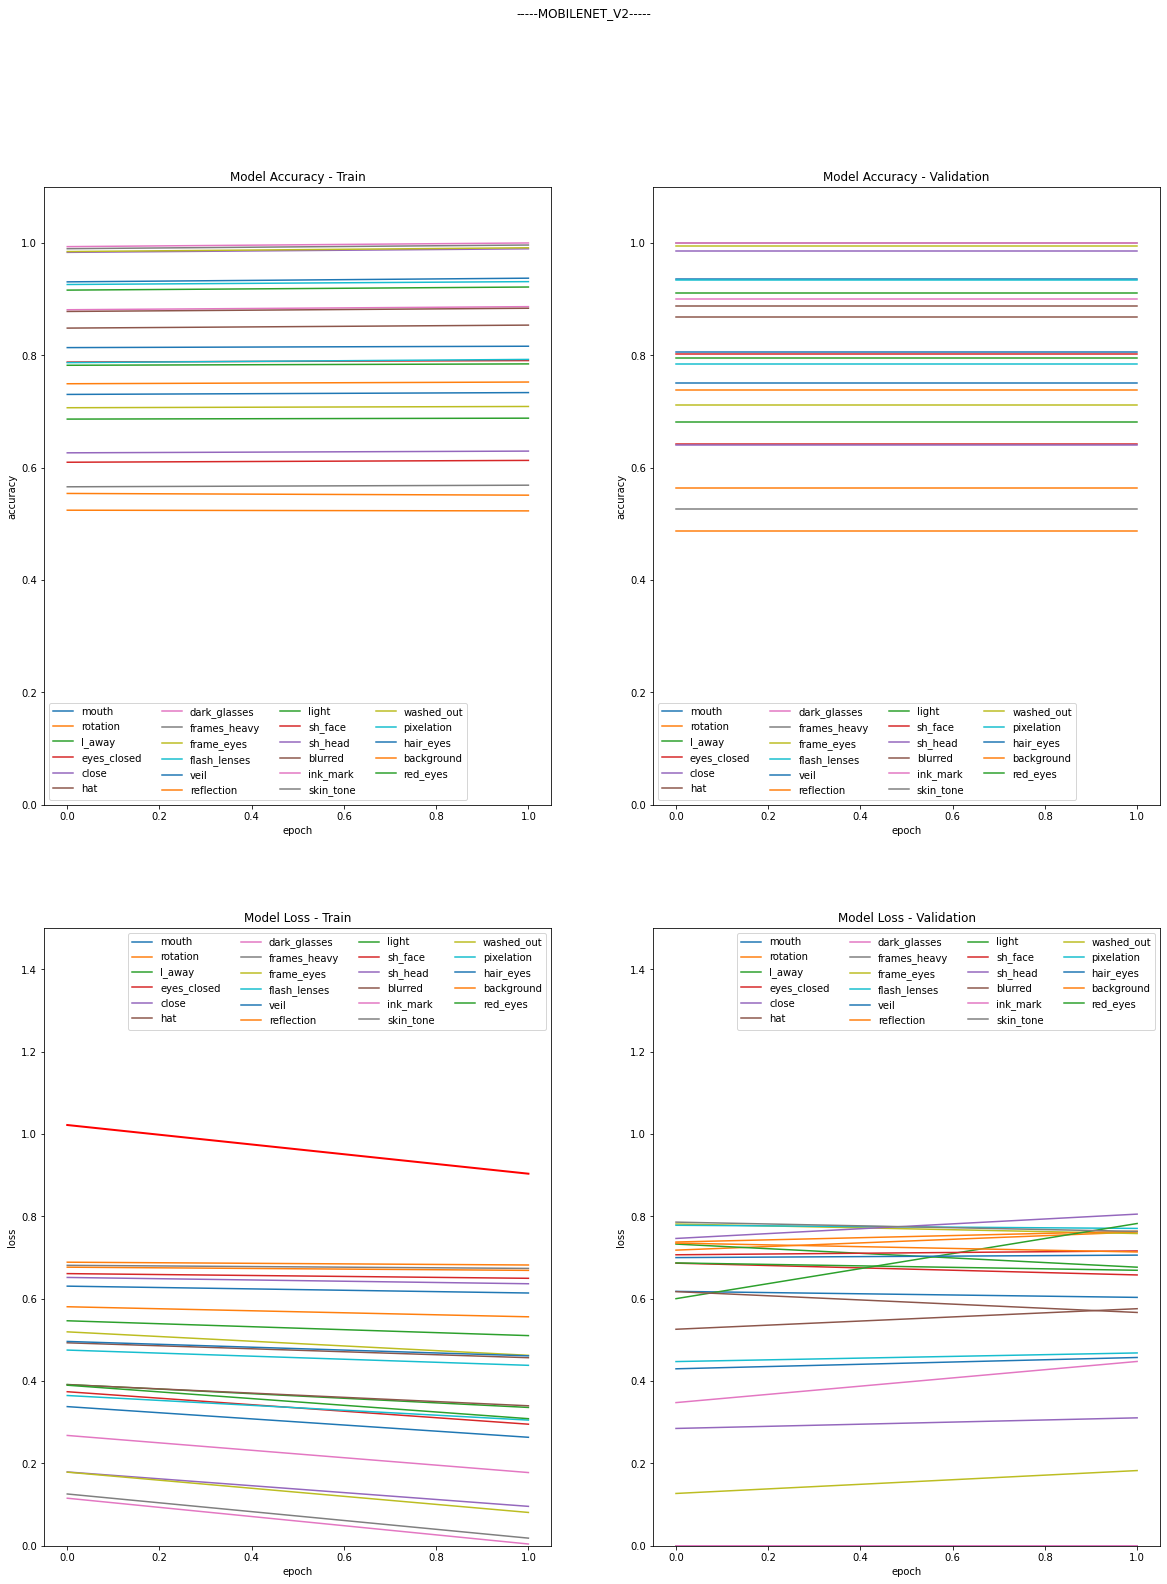

In [14]:
runner.draw_training_history()

# Load Best Model

In [15]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [16]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving process finished


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
18/18 [==============================] - 1s 59ms/step
Prediction finished!
Task: MOUTH


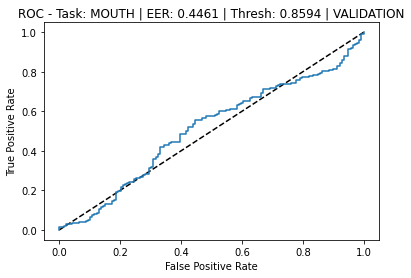

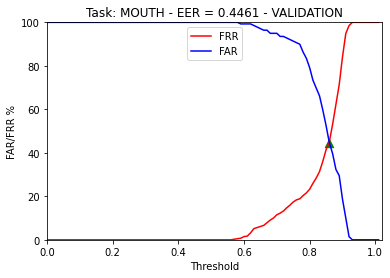

Task: MOUTH - EER_interp: 44.61% - Best Threshold: 0.8594435944276697
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.30      0.55      0.39       139
    COMPLIANT       0.78      0.55      0.65       408

     accuracy                           0.55       547
    macro avg       0.54      0.55      0.52       547
 weighted avg       0.66      0.55      0.58       547

Confusion matrix ----------------------------------------
FAR: 44.6% | FRR: 44.61% | EER_mean: 44.6% | TP: 226 | TN: 77 | FP: 62 | FN: 182
Accuracy ------------------------------------------------
Model Accuracy: 55.38999999999999%
---------------------------------------------------------
Task: ROTATION


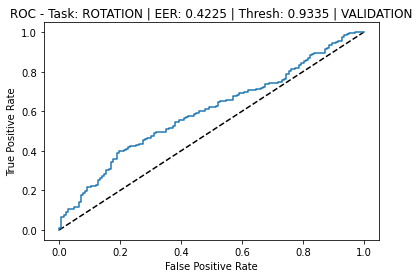

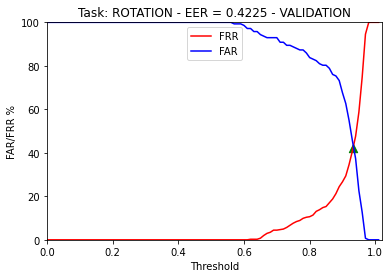

Task: ROTATION - EER_interp: 42.25% - Best Threshold: 0.9334763884544364
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.32      0.58      0.42       142
    COMPLIANT       0.80      0.58      0.67       405

     accuracy                           0.58       547
    macro avg       0.56      0.58      0.54       547
 weighted avg       0.67      0.58      0.60       547

Confusion matrix ----------------------------------------
FAR: 42.25% | FRR: 42.22% | EER_mean: 42.24% | TP: 234 | TN: 82 | FP: 60 | FN: 171
Accuracy ------------------------------------------------
Model Accuracy: 57.769999999999996%
---------------------------------------------------------
Task: L_AWAY


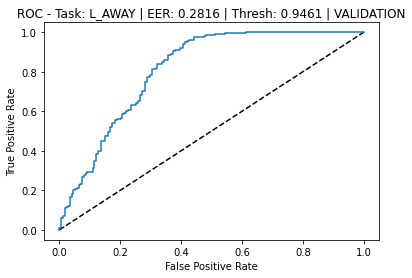

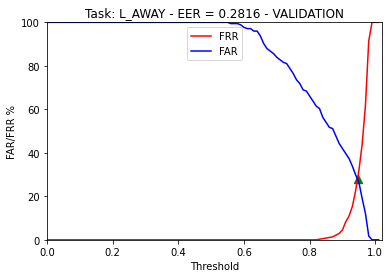

Task: L_AWAY - EER_interp: 28.16% - Best Threshold: 0.9461163282394467
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.53      0.72      0.61       174
    COMPLIANT       0.84      0.71      0.77       373

     accuracy                           0.71       547
    macro avg       0.69      0.71      0.69       547
 weighted avg       0.74      0.71      0.72       547

Confusion matrix ----------------------------------------
FAR: 28.16% | FRR: 29.49% | EER_mean: 28.82% | TP: 263 | TN: 125 | FP: 49 | FN: 110
Accuracy ------------------------------------------------
Model Accuracy: 70.93%
---------------------------------------------------------
Task: EYES_CLOSED


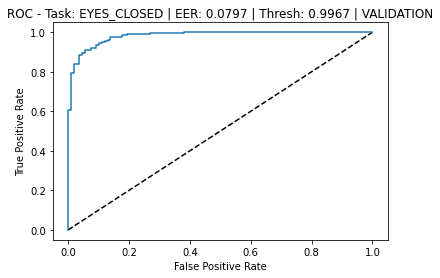

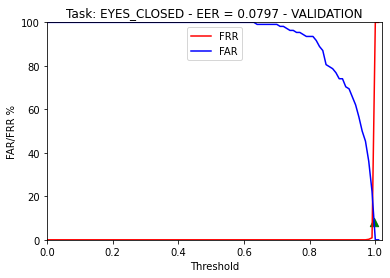

Task: EYES_CLOSED - EER_interp: 7.969999999999999% - Best Threshold: 0.996710462559329
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.74      0.93      0.82       108
    COMPLIANT       0.98      0.92      0.95       439

     accuracy                           0.92       547
    macro avg       0.86      0.92      0.89       547
 weighted avg       0.93      0.92      0.92       547

Confusion matrix ----------------------------------------
FAR: 7.41% | FRR: 7.969999999999999% | EER_mean: 7.6899999999999995% | TP: 404 | TN: 100 | FP: 8 | FN: 35
Accuracy ------------------------------------------------
Model Accuracy: 92.14%
---------------------------------------------------------
Task: CLOSE


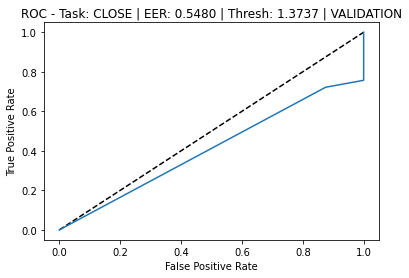

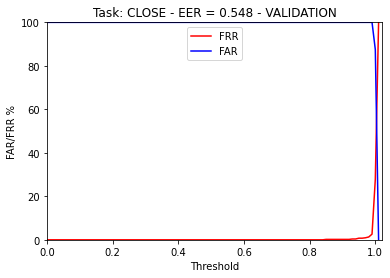

Task: CLOSE - EER_interp: 54.800000000000004% - Best Threshold: 1.3737109658678288
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      1.00      0.03         8
    COMPLIANT       0.00      0.00      0.00       539

     accuracy                           0.01       547
    macro avg       0.01      0.50      0.01       547
 weighted avg       0.00      0.01      0.00       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 8 | FP: 0 | FN: 539
Accuracy ------------------------------------------------
Model Accuracy: 1.46%
---------------------------------------------------------
Task: HAT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


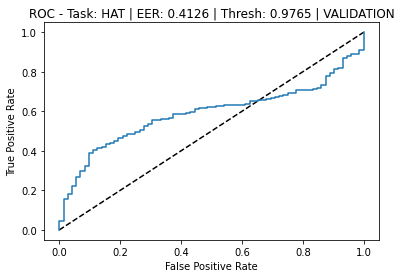

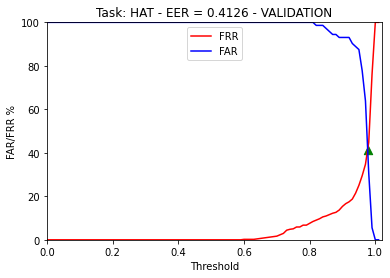

Task: HAT - EER_interp: 41.260000000000005% - Best Threshold: 0.9765175336285641
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.18      0.60      0.28        72
    COMPLIANT       0.91      0.59      0.71       475

     accuracy                           0.59       547
    macro avg       0.54      0.59      0.49       547
 weighted avg       0.81      0.59      0.66       547

Confusion matrix ----------------------------------------
FAR: 40.28% | FRR: 41.260000000000005% | EER_mean: 40.77% | TP: 279 | TN: 43 | FP: 29 | FN: 196
Accuracy ------------------------------------------------
Model Accuracy: 58.87%
---------------------------------------------------------
Task: DARK_GLASSES


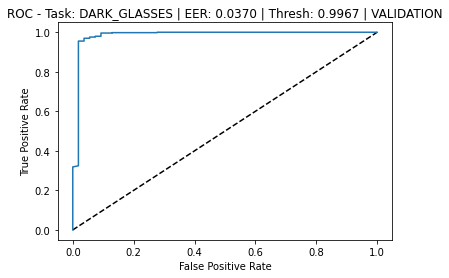

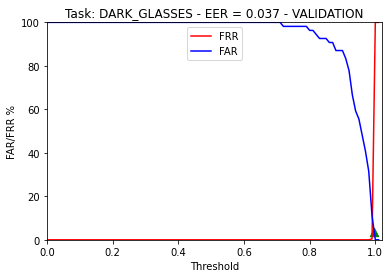

Task: DARK_GLASSES - EER_interp: 3.6999999999999997% - Best Threshold: 0.996737539768211
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.78      0.96      0.86        54
    COMPLIANT       1.00      0.97      0.98       493

     accuracy                           0.97       547
    macro avg       0.89      0.97      0.92       547
 weighted avg       0.97      0.97      0.97       547

Confusion matrix ----------------------------------------
FAR: 3.6999999999999997% | FRR: 3.04% | EER_mean: 3.37% | TP: 478 | TN: 52 | FP: 2 | FN: 15
Accuracy ------------------------------------------------
Model Accuracy: 96.89%
---------------------------------------------------------
Task: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


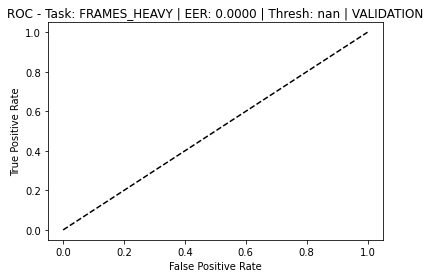

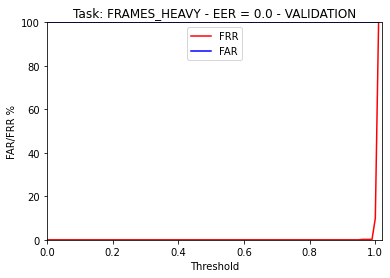

Task: FRAMES_HEAVY - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         0
    COMPLIANT       1.00      1.00      1.00       547

    micro avg       1.00      1.00      1.00       547
    macro avg       0.50      0.50      0.50       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: nan% | FRR: 0.0% | EER_mean: nan% | TP: 547 | TN: 0 | FP: 0 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 100.0%
---------------------------------------------------------
Task: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
src/base/model_evaluator.py:279: RuntimeWarning: invalid value encountered in long_scalars
  print(f'FAR: {FAR*100}% | FRR: {FRR*100}% | EER_mean: {EER_mean*100}% | TP: {TP} | TN: {TN} | FP: {FP} | FN: {FN}')


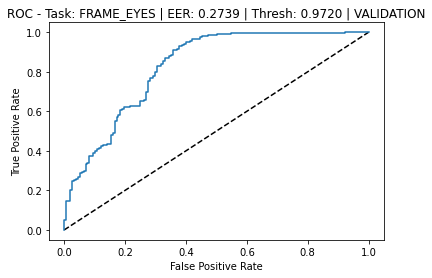

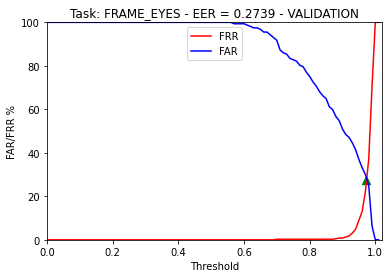

Task: FRAME_EYES - EER_interp: 27.389999999999997% - Best Threshold: 0.9720129966735466
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.54      0.73      0.62       157
    COMPLIANT       0.87      0.75      0.81       390

     accuracy                           0.75       547
    macro avg       0.71      0.74      0.72       547
 weighted avg       0.78      0.75      0.75       547

Confusion matrix ----------------------------------------
FAR: 27.389999999999997% | FRR: 24.62% | EER_mean: 26.0% | TP: 294 | TN: 114 | FP: 43 | FN: 96
Accuracy ------------------------------------------------
Model Accuracy: 74.59%
---------------------------------------------------------
Task: FLASH_LENSES


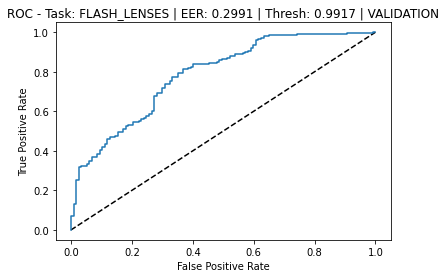

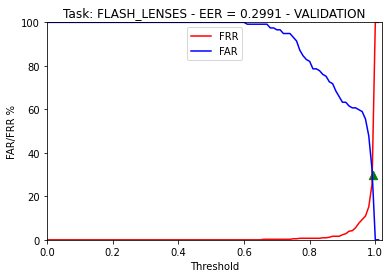

Task: FLASH_LENSES - EER_interp: 29.909999999999997% - Best Threshold: 0.991725087165835
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.38      0.70      0.50       117
    COMPLIANT       0.89      0.69      0.78       430

     accuracy                           0.69       547
    macro avg       0.64      0.70      0.64       547
 weighted avg       0.79      0.69      0.72       547

Confusion matrix ----------------------------------------
FAR: 29.909999999999997% | FRR: 30.7% | EER_mean: 30.3% | TP: 298 | TN: 82 | FP: 35 | FN: 132
Accuracy ------------------------------------------------
Model Accuracy: 69.47%
---------------------------------------------------------
Task: VEIL


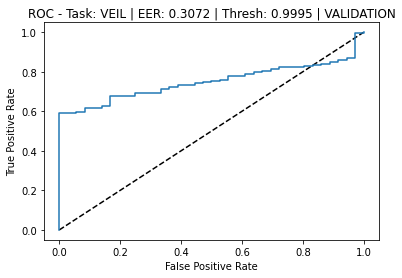

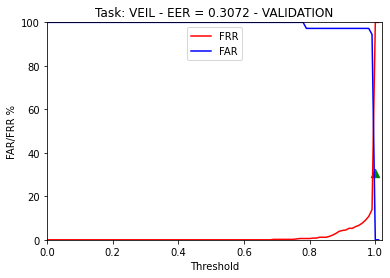

Task: VEIL - EER_interp: 30.72% - Best Threshold: 0.9994655123195536
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.14      0.69      0.23        36
    COMPLIANT       0.97      0.69      0.81       511

     accuracy                           0.69       547
    macro avg       0.55      0.69      0.52       547
 weighted avg       0.92      0.69      0.77       547

Confusion matrix ----------------------------------------
FAR: 30.56% | FRR: 30.72% | EER_mean: 30.64% | TP: 354 | TN: 25 | FP: 11 | FN: 157
Accuracy ------------------------------------------------
Model Accuracy: 69.28999999999999%
---------------------------------------------------------
Task: REFLECTION


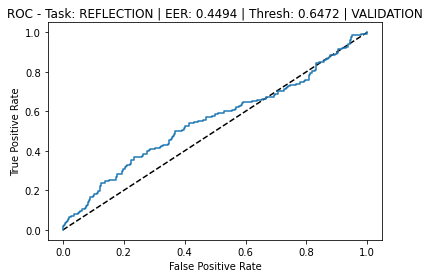

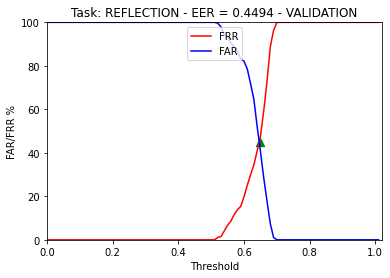

Task: REFLECTION - EER_interp: 44.940000000000005% - Best Threshold: 0.6472031898712843
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.56      0.55      0.56       280
    COMPLIANT       0.54      0.55      0.54       267

     accuracy                           0.55       547
    macro avg       0.55      0.55      0.55       547
 weighted avg       0.55      0.55      0.55       547

Confusion matrix ----------------------------------------
FAR: 45.0% | FRR: 44.940000000000005% | EER_mean: 44.97% | TP: 147 | TN: 154 | FP: 126 | FN: 120
Accuracy ------------------------------------------------
Model Accuracy: 55.03%
---------------------------------------------------------
Task: LIGHT


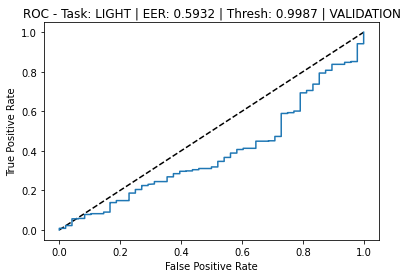

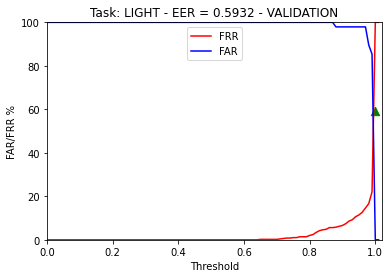

Task: LIGHT - EER_interp: 59.31999999999999% - Best Threshold: 0.9987433053448588
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.06      0.42      0.11        48
    COMPLIANT       0.88      0.41      0.56       499

     accuracy                           0.41       547
    macro avg       0.47      0.41      0.33       547
 weighted avg       0.81      0.41      0.52       547

Confusion matrix ----------------------------------------
FAR: 58.330000000000005% | FRR: 59.31999999999999% | EER_mean: 58.81999999999999% | TP: 203 | TN: 20 | FP: 28 | FN: 296
Accuracy ------------------------------------------------
Model Accuracy: 40.77%
---------------------------------------------------------
Task: SH_FACE


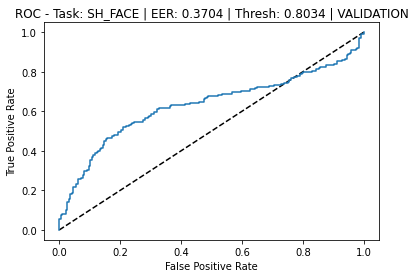

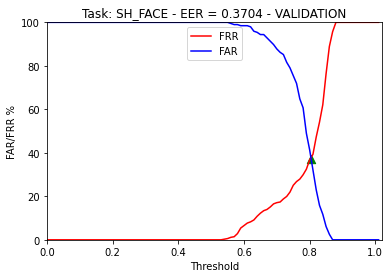

Task: SH_FACE - EER_interp: 37.04% - Best Threshold: 0.8034093460918954
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.49      0.63      0.55       196
    COMPLIANT       0.75      0.63      0.69       351

     accuracy                           0.63       547
    macro avg       0.62      0.63      0.62       547
 weighted avg       0.66      0.63      0.64       547

Confusion matrix ----------------------------------------
FAR: 36.730000000000004% | FRR: 37.04% | EER_mean: 36.88% | TP: 221 | TN: 124 | FP: 72 | FN: 130
Accuracy ------------------------------------------------
Model Accuracy: 63.07000000000001%
---------------------------------------------------------
Task: SH_HEAD


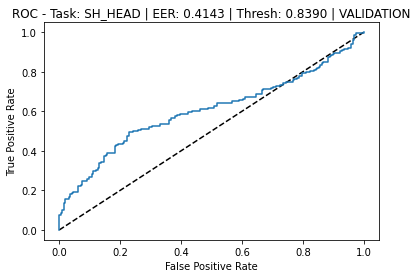

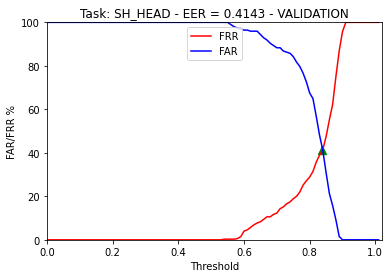

Task: SH_HEAD - EER_interp: 41.43% - Best Threshold: 0.8389666388716045
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.44      0.59      0.51       197
    COMPLIANT       0.72      0.59      0.64       350

     accuracy                           0.59       547
    macro avg       0.58      0.59      0.58       547
 weighted avg       0.62      0.59      0.59       547

Confusion matrix ----------------------------------------
FAR: 41.120000000000005% | FRR: 41.43% | EER_mean: 41.28% | TP: 205 | TN: 116 | FP: 81 | FN: 145
Accuracy ------------------------------------------------
Model Accuracy: 58.68%
---------------------------------------------------------
Task: BLURRED


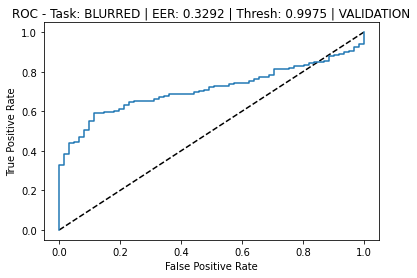

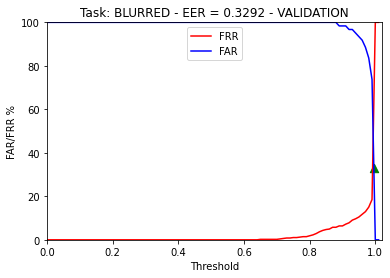

Task: BLURRED - EER_interp: 32.92% - Best Threshold: 0.9974892266983848
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.20      0.67      0.31        61
    COMPLIANT       0.94      0.67      0.78       486

     accuracy                           0.67       547
    macro avg       0.57      0.67      0.55       547
 weighted avg       0.86      0.67      0.73       547

Confusion matrix ----------------------------------------
FAR: 32.79% | FRR: 32.92% | EER_mean: 32.86% | TP: 326 | TN: 41 | FP: 20 | FN: 160
Accuracy ------------------------------------------------
Model Accuracy: 67.09%
---------------------------------------------------------
Task: SKIN_TONE


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


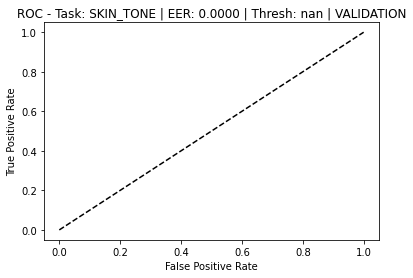

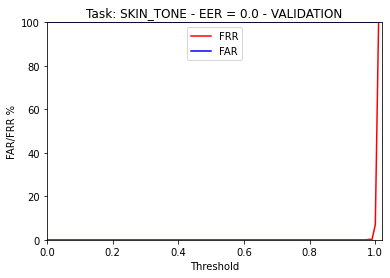

Task: SKIN_TONE - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         0
    COMPLIANT       1.00      1.00      1.00       547

    micro avg       1.00      1.00      1.00       547
    macro avg       0.50      0.50      0.50       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: nan% | FRR: 0.0% | EER_mean: nan% | TP: 547 | TN: 0 | FP: 0 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 100.0%
---------------------------------------------------------
Task: WASHED_OUT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
src/base/model_evaluator.py:279: RuntimeWarning: invalid value encountered in long_scalars
  print(f'FAR: {FAR*100}% | FRR: {FRR*100}% | EER_mean: {EER_mean*100}% | TP: {TP} | TN: {TN} | FP: {FP} | FN: {FN}')


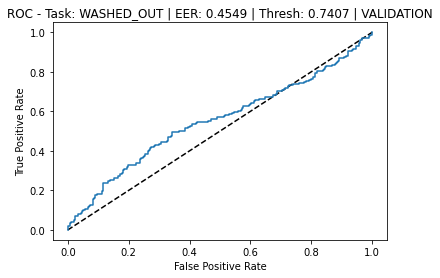

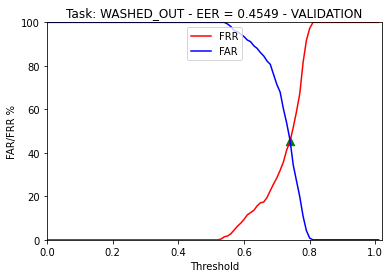

Task: WASHED_OUT - EER_interp: 45.49% - Best Threshold: 0.7406665700729247
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.52      0.54      0.53       259
    COMPLIANT       0.57      0.55      0.56       288

     accuracy                           0.54       547
    macro avg       0.54      0.54      0.54       547
 weighted avg       0.55      0.54      0.55       547

Confusion matrix ----------------------------------------
FAR: 45.56% | FRR: 45.49% | EER_mean: 45.519999999999996% | TP: 157 | TN: 141 | FP: 118 | FN: 131
Accuracy ------------------------------------------------
Model Accuracy: 54.48%
---------------------------------------------------------
Task: PIXELATION


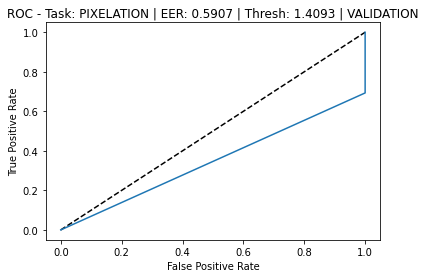

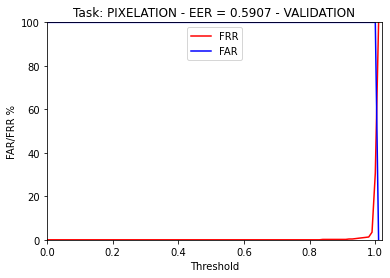

Task: PIXELATION - EER_interp: 59.07% - Best Threshold: 1.4093376764386867
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      1.00      0.01         3
    COMPLIANT       0.00      0.00      0.00       544

     accuracy                           0.01       547
    macro avg       0.00      0.50      0.01       547
 weighted avg       0.00      0.01      0.00       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 3 | FP: 0 | FN: 544
Accuracy ------------------------------------------------
Model Accuracy: 0.5499999999999999%
---------------------------------------------------------
Task: HAIR_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


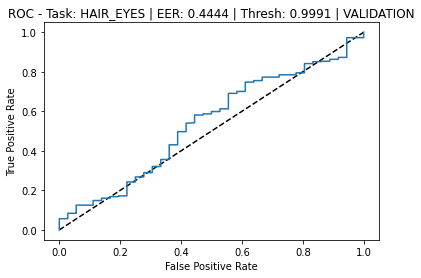

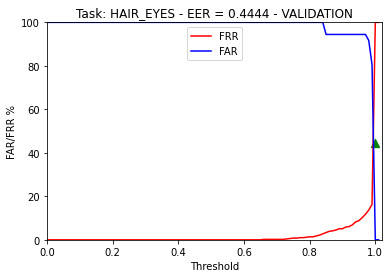

Task: HAIR_EYES - EER_interp: 44.440000000000005% - Best Threshold: 0.9991355538368234
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.08      0.56      0.14        36
    COMPLIANT       0.95      0.54      0.69       511

     accuracy                           0.54       547
    macro avg       0.51      0.55      0.41       547
 weighted avg       0.89      0.54      0.65       547

Confusion matrix ----------------------------------------
FAR: 44.440000000000005% | FRR: 45.79% | EER_mean: 45.12% | TP: 277 | TN: 20 | FP: 16 | FN: 234
Accuracy ------------------------------------------------
Model Accuracy: 54.300000000000004%
---------------------------------------------------------
Task: BACKGROUND


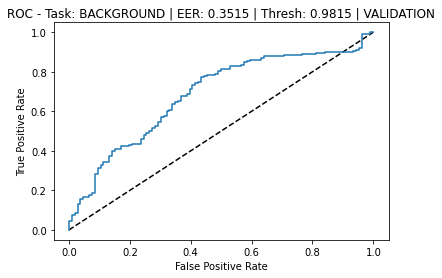

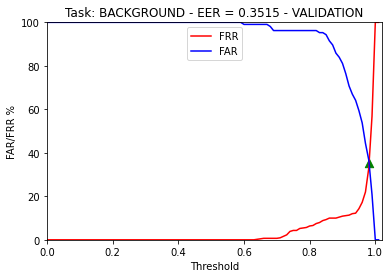

Task: BACKGROUND - EER_interp: 35.15% - Best Threshold: 0.9814842201414562
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.31      0.65      0.42       106
    COMPLIANT       0.89      0.65      0.75       441

     accuracy                           0.65       547
    macro avg       0.60      0.65      0.58       547
 weighted avg       0.77      0.65      0.68       547

Confusion matrix ----------------------------------------
FAR: 34.910000000000004% | FRR: 35.15% | EER_mean: 35.03% | TP: 286 | TN: 69 | FP: 37 | FN: 155
Accuracy ------------------------------------------------
Model Accuracy: 64.9%
---------------------------------------------------------
Task: RED_EYES


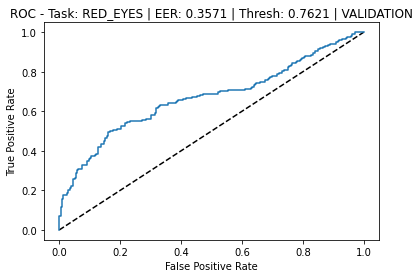

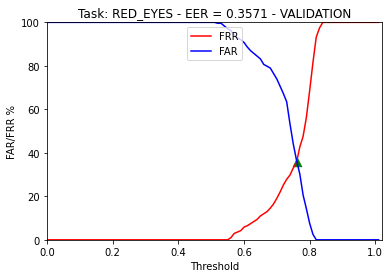

Task: RED_EYES - EER_interp: 35.709999999999994% - Best Threshold: 0.7621454596518952
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.58      0.64      0.61       238
    COMPLIANT       0.70      0.64      0.67       309

     accuracy                           0.64       547
    macro avg       0.64      0.64      0.64       547
 weighted avg       0.65      0.64      0.64       547

Confusion matrix ----------------------------------------
FAR: 35.709999999999994% | FRR: 35.6% | EER_mean: 35.66% | TP: 199 | TN: 153 | FP: 85 | FN: 110
Accuracy ------------------------------------------------
Model Accuracy: 64.35%
---------------------------------------------------------
final_EER_mean: nan% | final_ACC: 62.27%


In [23]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 1s 71ms/step
Prediction finished!
Task: MOUTH


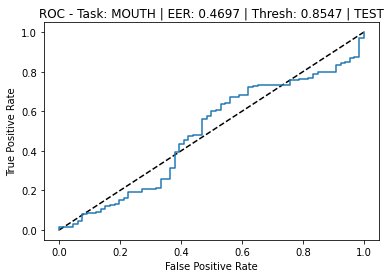

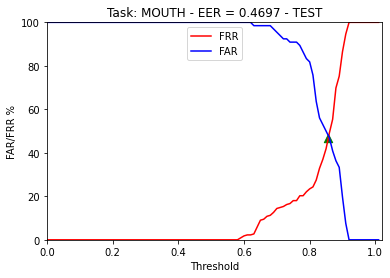

Task: MOUTH - EER_interp: 46.97% - Best Threshold: 0.8546651601791364
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.27      0.53      0.35        66
    COMPLIANT       0.80      0.56      0.66       222

     accuracy                           0.56       288
    macro avg       0.53      0.55      0.51       288
 weighted avg       0.68      0.56      0.59       288

Confusion matrix ----------------------------------------
FAR: 46.97% | FRR: 43.69% | EER_mean: 45.33% | TP: 125 | TN: 35 | FP: 31 | FN: 97
Accuracy ------------------------------------------------
Model Accuracy: 55.559999999999995%
---------------------------------------------------------
Task: ROTATION


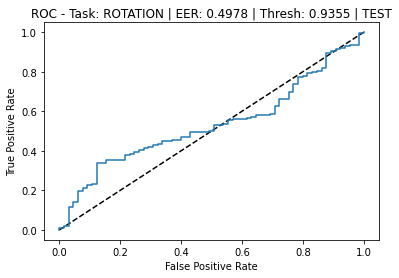

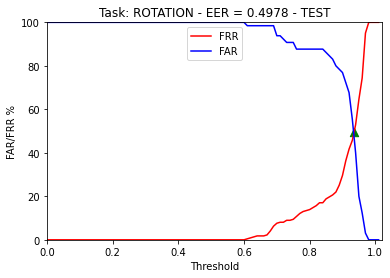

Task: ROTATION - EER_interp: 49.78% - Best Threshold: 0.9354867945872081
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.23      0.51      0.32        65
    COMPLIANT       0.78      0.50      0.61       223

     accuracy                           0.50       288
    macro avg       0.50      0.50      0.46       288
 weighted avg       0.65      0.50      0.54       288

Confusion matrix ----------------------------------------
FAR: 49.230000000000004% | FRR: 49.78% | EER_mean: 49.5% | TP: 112 | TN: 33 | FP: 32 | FN: 111
Accuracy ------------------------------------------------
Model Accuracy: 50.349999999999994%
---------------------------------------------------------
Task: L_AWAY


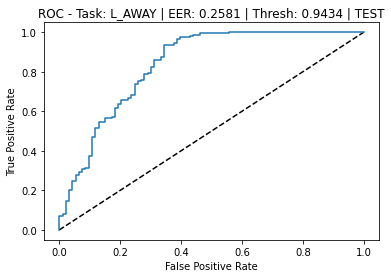

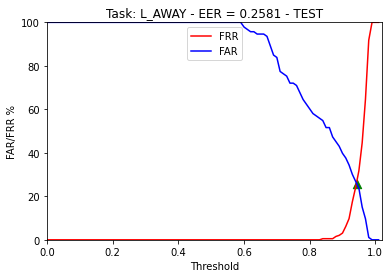

Task: L_AWAY - EER_interp: 25.81% - Best Threshold: 0.9433884024620959
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.57      0.74      0.65        93
    COMPLIANT       0.86      0.74      0.79       195

     accuracy                           0.74       288
    macro avg       0.72      0.74      0.72       288
 weighted avg       0.77      0.74      0.75       288

Confusion matrix ----------------------------------------
FAR: 25.81% | FRR: 26.150000000000002% | EER_mean: 25.979999999999997% | TP: 144 | TN: 69 | FP: 24 | FN: 51
Accuracy ------------------------------------------------
Model Accuracy: 73.96000000000001%
---------------------------------------------------------
Task: EYES_CLOSED


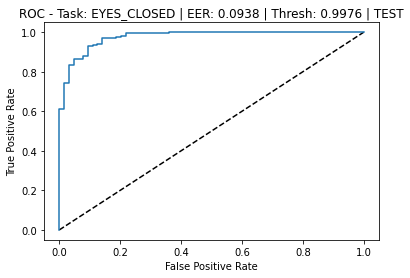

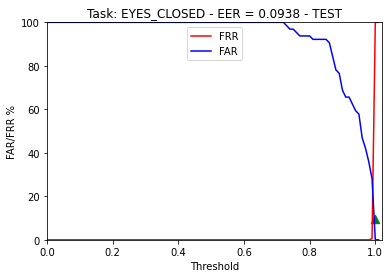

Task: EYES_CLOSED - EER_interp: 9.379999999999999% - Best Threshold: 0.9976031184196439
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.78      0.91      0.84        64
    COMPLIANT       0.97      0.93      0.95       224

     accuracy                           0.92       288
    macro avg       0.88      0.92      0.90       288
 weighted avg       0.93      0.92      0.93       288

Confusion matrix ----------------------------------------
FAR: 9.379999999999999% | FRR: 7.140000000000001% | EER_mean: 8.260000000000002% | TP: 208 | TN: 58 | FP: 6 | FN: 16
Accuracy ------------------------------------------------
Model Accuracy: 92.36%
---------------------------------------------------------
Task: CLOSE


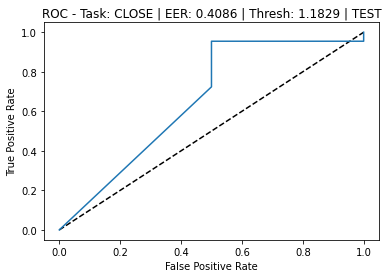

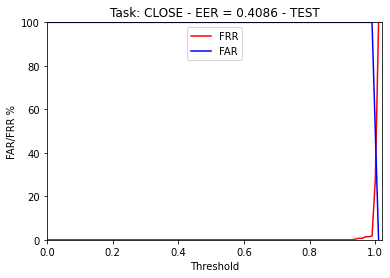

Task: CLOSE - EER_interp: 40.86% - Best Threshold: 1.1828571428571428
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      1.00      0.01         2
    COMPLIANT       0.00      0.00      0.00       286

     accuracy                           0.01       288
    macro avg       0.00      0.50      0.01       288
 weighted avg       0.00      0.01      0.00       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 2 | FP: 0 | FN: 286
Accuracy ------------------------------------------------
Model Accuracy: 0.69%
---------------------------------------------------------
Task: HAT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


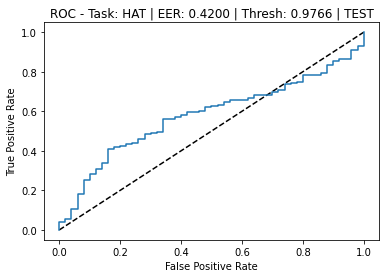

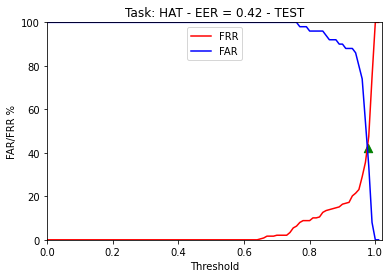

Task: HAT - EER_interp: 42.0% - Best Threshold: 0.9765635728836064
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.22      0.58      0.32        50
    COMPLIANT       0.87      0.58      0.70       238

     accuracy                           0.58       288
    macro avg       0.55      0.58      0.51       288
 weighted avg       0.76      0.58      0.63       288

Confusion matrix ----------------------------------------
FAR: 42.0% | FRR: 42.02% | EER_mean: 42.01% | TP: 138 | TN: 29 | FP: 21 | FN: 100
Accuracy ------------------------------------------------
Model Accuracy: 57.989999999999995%
---------------------------------------------------------
Task: DARK_GLASSES


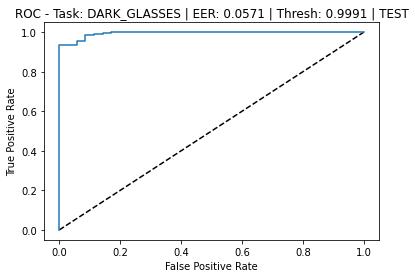

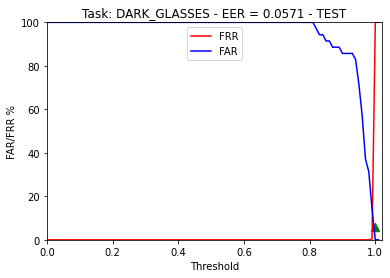

Task: DARK_GLASSES - EER_interp: 5.71% - Best Threshold: 0.9991282820701624
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.67      0.94      0.79        35
    COMPLIANT       0.99      0.94      0.96       253

     accuracy                           0.94       288
    macro avg       0.83      0.94      0.87       288
 weighted avg       0.95      0.94      0.94       288

Confusion matrix ----------------------------------------
FAR: 5.71% | FRR: 6.32% | EER_mean: 6.02% | TP: 237 | TN: 33 | FP: 2 | FN: 16
Accuracy ------------------------------------------------
Model Accuracy: 93.75%
---------------------------------------------------------
Task: FRAMES_HEAVY


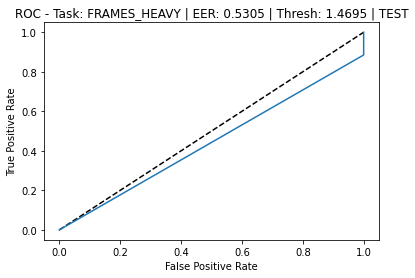

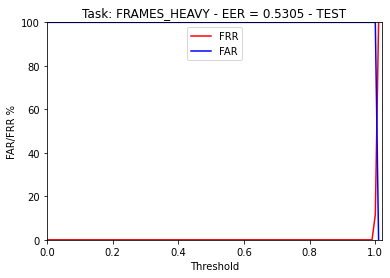

Task: FRAMES_HEAVY - EER_interp: 53.05% - Best Threshold: 1.4695009242144834
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      1.00      0.01         1
    COMPLIANT       0.00      0.00      0.00       287

     accuracy                           0.00       288
    macro avg       0.00      0.50      0.00       288
 weighted avg       0.00      0.00      0.00       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 1 | FP: 0 | FN: 287
Accuracy ------------------------------------------------
Model Accuracy: 0.35000000000000003%
---------------------------------------------------------
Task: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


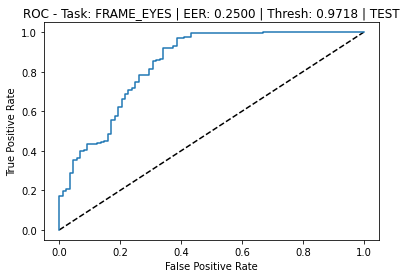

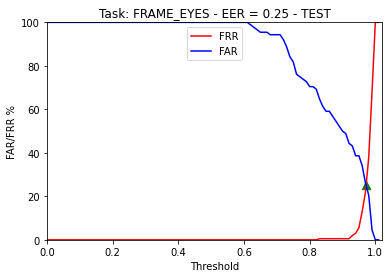

Task: FRAME_EYES - EER_interp: 25.0% - Best Threshold: 0.9718101620674133
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.57      0.75      0.65        88
    COMPLIANT       0.87      0.75      0.81       200

     accuracy                           0.75       288
    macro avg       0.72      0.75      0.73       288
 weighted avg       0.78      0.75      0.76       288

Confusion matrix ----------------------------------------
FAR: 25.0% | FRR: 25.0% | EER_mean: 25.0% | TP: 150 | TN: 66 | FP: 22 | FN: 50
Accuracy ------------------------------------------------
Model Accuracy: 75.0%
---------------------------------------------------------
Task: FLASH_LENSES


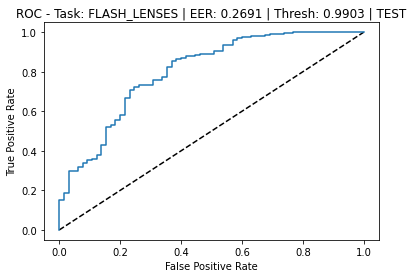

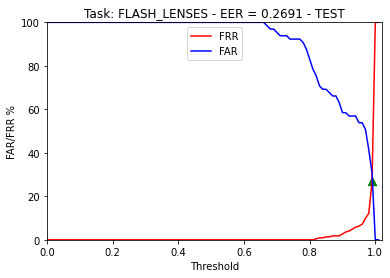

Task: FLASH_LENSES - EER_interp: 26.91% - Best Threshold: 0.9903496164377493
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.44      0.74      0.55        65
    COMPLIANT       0.91      0.73      0.81       223

     accuracy                           0.73       288
    macro avg       0.68      0.73      0.68       288
 weighted avg       0.80      0.73      0.75       288

Confusion matrix ----------------------------------------
FAR: 26.150000000000002% | FRR: 26.91% | EER_mean: 26.529999999999998% | TP: 163 | TN: 48 | FP: 17 | FN: 60
Accuracy ------------------------------------------------
Model Accuracy: 73.26%
---------------------------------------------------------
Task: VEIL


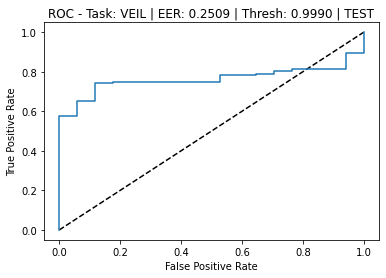

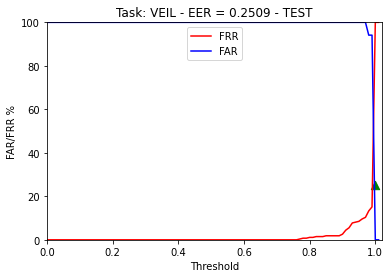

Task: VEIL - EER_interp: 25.09% - Best Threshold: 0.9990422896133577
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.17      0.82      0.28        17
    COMPLIANT       0.99      0.75      0.85       271

     accuracy                           0.75       288
    macro avg       0.58      0.79      0.57       288
 weighted avg       0.94      0.75      0.82       288

Confusion matrix ----------------------------------------
FAR: 17.65% | FRR: 25.09% | EER_mean: 21.37% | TP: 203 | TN: 14 | FP: 3 | FN: 68
Accuracy ------------------------------------------------
Model Accuracy: 75.35%
---------------------------------------------------------
Task: REFLECTION


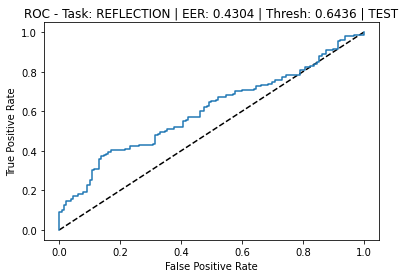

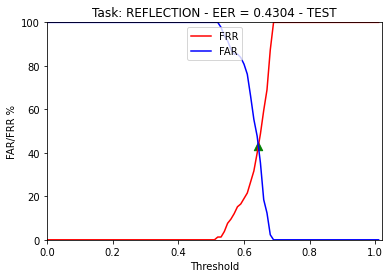

Task: REFLECTION - EER_interp: 43.04% - Best Threshold: 0.6435516280464124
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.52      0.57      0.54       130
    COMPLIANT       0.62      0.57      0.59       158

     accuracy                           0.57       288
    macro avg       0.57      0.57      0.57       288
 weighted avg       0.57      0.57      0.57       288

Confusion matrix ----------------------------------------
FAR: 43.08% | FRR: 43.04% | EER_mean: 43.059999999999995% | TP: 90 | TN: 74 | FP: 56 | FN: 68
Accuracy ------------------------------------------------
Model Accuracy: 56.940000000000005%
---------------------------------------------------------
Task: LIGHT


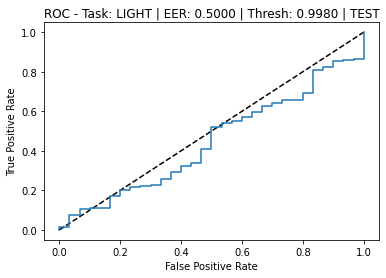

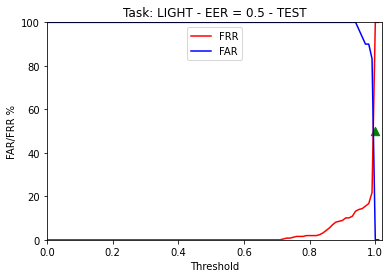

Task: LIGHT - EER_interp: 50.0% - Best Threshold: 0.9979943037033079
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.11      0.50      0.18        30
    COMPLIANT       0.90      0.52      0.66       258

     accuracy                           0.52       288
    macro avg       0.50      0.51      0.42       288
 weighted avg       0.82      0.52      0.61       288

Confusion matrix ----------------------------------------
FAR: 50.0% | FRR: 48.06% | EER_mean: 49.03% | TP: 134 | TN: 15 | FP: 15 | FN: 124
Accuracy ------------------------------------------------
Model Accuracy: 51.739999999999995%
---------------------------------------------------------
Task: SH_FACE


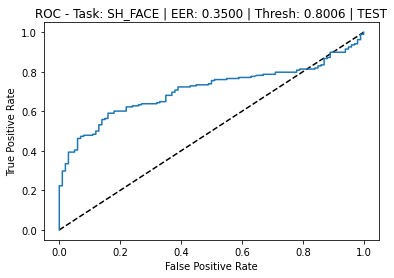

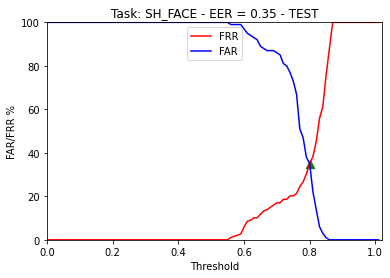

Task: SH_FACE - EER_interp: 35.0% - Best Threshold: 0.8006314635276959
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.50      0.65      0.56       100
    COMPLIANT       0.78      0.65      0.71       188

     accuracy                           0.65       288
    macro avg       0.64      0.65      0.64       288
 weighted avg       0.68      0.65      0.66       288

Confusion matrix ----------------------------------------
FAR: 35.0% | FRR: 35.11% | EER_mean: 35.06% | TP: 122 | TN: 65 | FP: 35 | FN: 66
Accuracy ------------------------------------------------
Model Accuracy: 64.92999999999999%
---------------------------------------------------------
Task: SH_HEAD


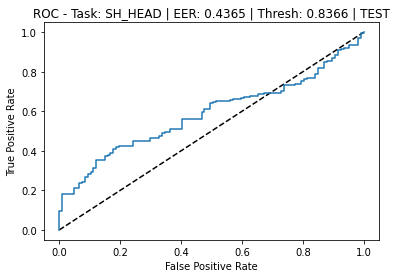

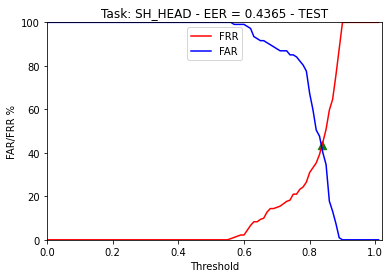

Task: SH_HEAD - EER_interp: 43.65% - Best Threshold: 0.8366109700586816
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.44      0.57      0.49       107
    COMPLIANT       0.69      0.56      0.62       181

     accuracy                           0.57       288
    macro avg       0.56      0.57      0.56       288
 weighted avg       0.60      0.57      0.57       288

Confusion matrix ----------------------------------------
FAR: 42.99% | FRR: 43.65% | EER_mean: 43.32% | TP: 102 | TN: 61 | FP: 46 | FN: 79
Accuracy ------------------------------------------------
Model Accuracy: 56.599999999999994%
---------------------------------------------------------
Task: BLURRED


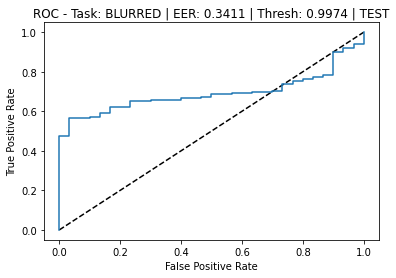

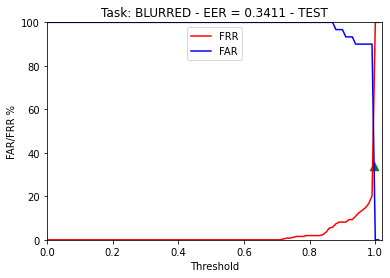

Task: BLURRED - EER_interp: 34.11% - Best Threshold: 0.9973969353261845
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.19      0.70      0.30        30
    COMPLIANT       0.95      0.66      0.78       258

     accuracy                           0.66       288
    macro avg       0.57      0.68      0.54       288
 weighted avg       0.87      0.66      0.73       288

Confusion matrix ----------------------------------------
FAR: 30.0% | FRR: 34.11% | EER_mean: 32.06% | TP: 170 | TN: 21 | FP: 9 | FN: 88
Accuracy ------------------------------------------------
Model Accuracy: 66.32000000000001%
---------------------------------------------------------
Task: SKIN_TONE


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


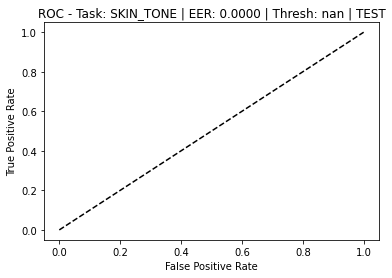

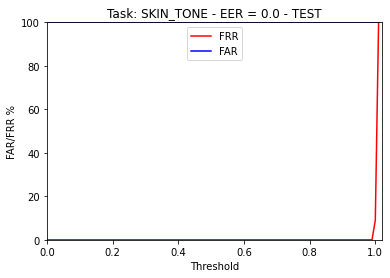

Task: SKIN_TONE - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         0
    COMPLIANT       1.00      1.00      1.00       288

    micro avg       1.00      1.00      1.00       288
    macro avg       0.50      0.50      0.50       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: nan% | FRR: 0.0% | EER_mean: nan% | TP: 288 | TN: 0 | FP: 0 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 100.0%
---------------------------------------------------------
Task: WASHED_OUT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
src/base/model_evaluator.py:279: RuntimeWarning: invalid value encountered in long_scalars
  print(f'FAR: {FAR*100}% | FRR: {FRR*100}% | EER_mean: {EER_mean*100}% | TP: {TP} | TN: {TN} | FP: {FP} | FN: {FN}')


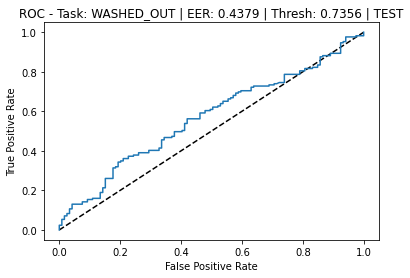

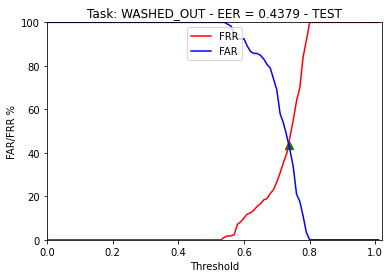

Task: WASHED_OUT - EER_interp: 43.79% - Best Threshold: 0.735648077408943
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.48      0.57      0.52       119
    COMPLIANT       0.65      0.56      0.60       169

     accuracy                           0.57       288
    macro avg       0.56      0.57      0.56       288
 weighted avg       0.58      0.57      0.57       288

Confusion matrix ----------------------------------------
FAR: 42.86% | FRR: 43.79% | EER_mean: 43.32% | TP: 95 | TN: 68 | FP: 51 | FN: 74
Accuracy ------------------------------------------------
Model Accuracy: 56.599999999999994%
---------------------------------------------------------
Task: PIXELATION


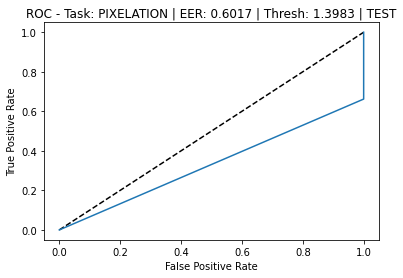

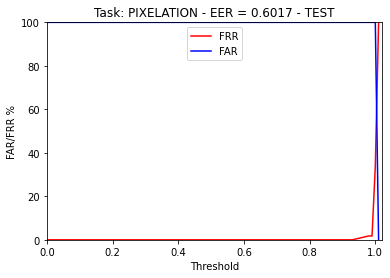

Task: PIXELATION - EER_interp: 60.17% - Best Threshold: 1.3983050847459628
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      1.00      0.03         4
    COMPLIANT       0.00      0.00      0.00       284

     accuracy                           0.01       288
    macro avg       0.01      0.50      0.01       288
 weighted avg       0.00      0.01      0.00       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 4 | FP: 0 | FN: 284
Accuracy ------------------------------------------------
Model Accuracy: 1.39%
---------------------------------------------------------
Task: HAIR_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


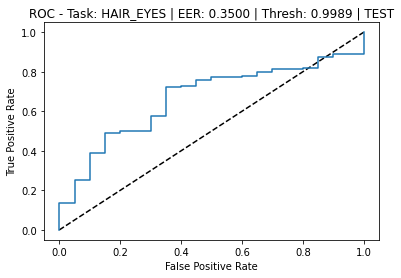

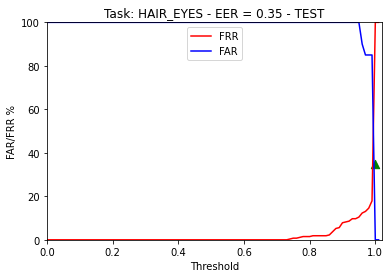

Task: HAIR_EYES - EER_interp: 35.0% - Best Threshold: 0.9989082813262957
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.10      0.65      0.18        20
    COMPLIANT       0.96      0.58      0.72       268

     accuracy                           0.58       288
    macro avg       0.53      0.61      0.45       288
 weighted avg       0.90      0.58      0.68       288

Confusion matrix ----------------------------------------
FAR: 35.0% | FRR: 42.16% | EER_mean: 38.58% | TP: 155 | TN: 13 | FP: 7 | FN: 113
Accuracy ------------------------------------------------
Model Accuracy: 58.330000000000005%
---------------------------------------------------------
Task: BACKGROUND


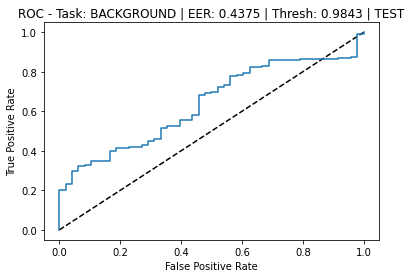

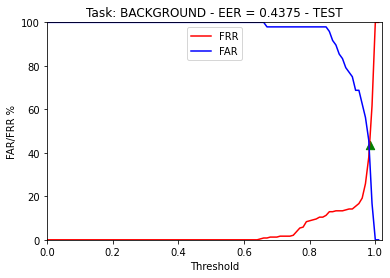

Task: BACKGROUND - EER_interp: 43.75% - Best Threshold: 0.9842531085014358
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.20      0.56      0.30        48
    COMPLIANT       0.86      0.56      0.68       240

     accuracy                           0.56       288
    macro avg       0.53      0.56      0.49       288
 weighted avg       0.75      0.56      0.62       288

Confusion matrix ----------------------------------------
FAR: 43.75% | FRR: 44.17% | EER_mean: 43.96% | TP: 134 | TN: 27 | FP: 21 | FN: 106
Accuracy ------------------------------------------------
Model Accuracy: 55.900000000000006%
---------------------------------------------------------
Task: RED_EYES


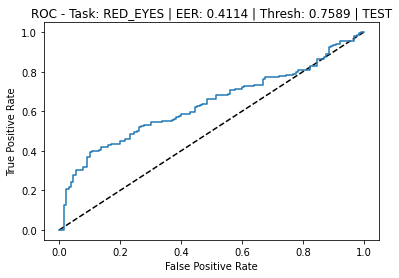

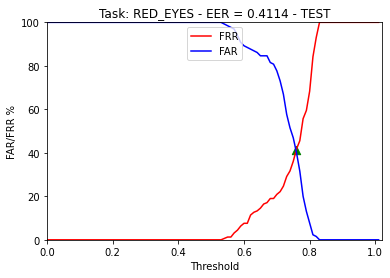

Task: RED_EYES - EER_interp: 41.14% - Best Threshold: 0.7589207187860818
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.54      0.59      0.57       130
    COMPLIANT       0.64      0.59      0.61       158

     accuracy                           0.59       288
    macro avg       0.59      0.59      0.59       288
 weighted avg       0.59      0.59      0.59       288

Confusion matrix ----------------------------------------
FAR: 40.77% | FRR: 41.14% | EER_mean: 40.949999999999996% | TP: 93 | TN: 77 | FP: 53 | FN: 65
Accuracy ------------------------------------------------
Model Accuracy: 59.03%
---------------------------------------------------------
final_EER_mean: nan% | final_ACC: 58.02%


In [24]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Visualize Model Classification

# Finishing Experiment Manager

In [ ]:
runner.finish_experiment()